In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
views = pd.read_csv('data/Philo_en.csv')
views

,project,article,timestamp,views
0,en.wikipedia,Absurdism,2018010100,50296
1,en.wikipedia,Absurdism,2018020100,44655
2,en.wikipedia,Absurdism,2018030100,50593
3,en.wikipedia,Absurdism,2018040100,50871
4,en.wikipedia,Absurdism,2018050100,48368
...,...,...,...,...
26216,en.wikipedia,Zurvanism,2022090100,4990
26217,en.wikipedia,Zurvanism,2022100100,4904
26218,en.wikipedia,Zurvanism,2022110100,4897
26219,en.wikipedia,Zurvanism,2022120100,5414


In [27]:
Views_diff = views.groupby('article')['views'].diff()
views['Views_diff'] = Views_diff
print(len(views['article'].unique()))
print(len(views[views['article']=='Absurdism']))
views

427
61


,project,article,timestamp,views,Views_diff
0,en.wikipedia,Absurdism,2018010100,50296,NaN
1,en.wikipedia,Absurdism,2018020100,44655,-5641.0
2,en.wikipedia,Absurdism,2018030100,50593,5938.0
3,en.wikipedia,Absurdism,2018040100,50871,278.0
4,en.wikipedia,Absurdism,2018050100,48368,-2503.0
...,...,...,...,...,...
26216,en.wikipedia,Zurvanism,2022090100,4990,-149.0
26217,en.wikipedia,Zurvanism,2022100100,4904,-86.0
26218,en.wikipedia,Zurvanism,2022110100,4897,-7.0
26219,en.wikipedia,Zurvanism,2022120100,5414,517.0


## Try to look at seasonality effects 

C:\Users\hippo\AppData\Local\Temp\ipykernel_31556\3960373937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Views_diff'] = subset['Views_diff'].fillna(0)


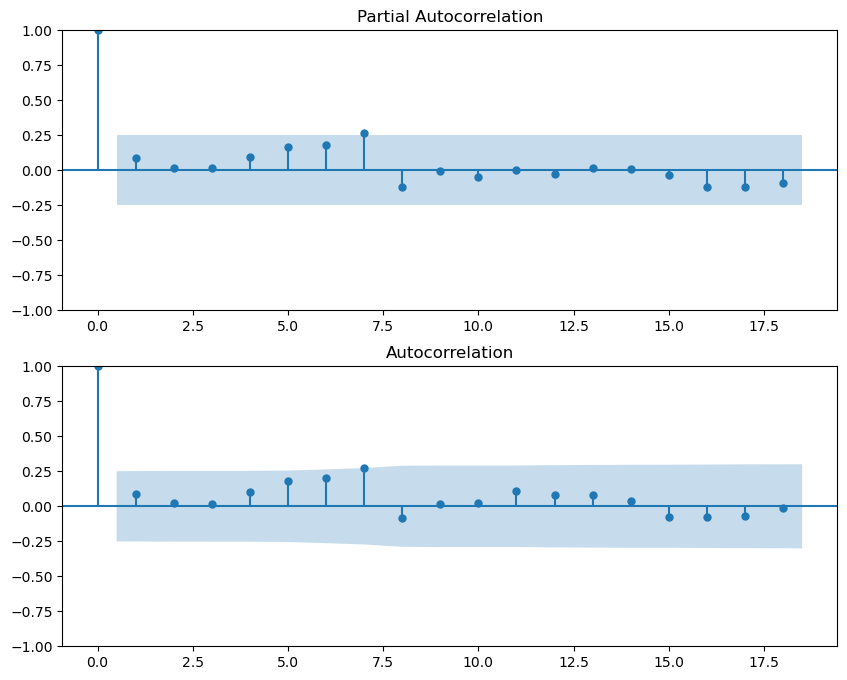

In [30]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

subset = views[views['article'] == 'Absurdism']
subset['Views_diff'] = subset['Views_diff'].fillna(0)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_pacf(subset['views'], ax=ax[0])
plot_acf(subset['views'], ax=ax[1])

plt.show()



In [ ]:
dates = pd.read_csv('data/Philo_en_dates.csv')